**Rent**

The purpose of this project is to use a data-driven approach to compare and determine the best neighborhood in Pittsburgh. Our analysis evaluated aspects of neighborhood living we deemed most relevant-such as crime rates, graduation rate, and rent prices.  

Originally, other metrics discussed were incarceration, environmental issues, fires, and others. Eventually we decided on metrics with more variability and relevance since these rejected metrics did not vary much from neighborhood to neighborhood. Therefor the metrics we chose seemed to be key drivers of why someone would prefer one neighborhood over the other.  

Our team spent a good portion of time finding data sets that were usable. Things we had to think about when finding data to use was how it was orginazed, its readability, and if it had a dictionary that could be used for our overall purpose, evaluating the best neighborhood. After combing through data sets that were years old and misrepresentative we eventually found data that was clean and worked for our metrics. 

**The Metric**
Our team defines the best neighborhood as one that has options for affordable housing, a dependable school, and a low rate of violence and crime. There are many factors that contribute to the best neighborhood, but we think this is a good baseline for choosing a place to live, as previously described.

The data sets used can be found with the following links. 

-Non-traffic citations
https://data.wprdc.org/dataset/non-traffic-citations/resource/6b11e87d-1216-463d-bbd3-37460e539d86

-Rent data set
https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2014-miscellaneous-data/resource/fe1d1e75-975e-42c0-b32b-64260a9a4a9a

-Graduation and other school data
https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2014-miscellaneous-data/resource/755c09dc-be92-4787-84a6-080d84345979



The data below is analysing the averagein a neighborhood  rent along with the available units, a factor that plays a major role in deciding on a place to live that is affordable in the lon Using these two variables we create a scaled rent value by finding the average and multiplying it by the scale factor of 40. We selected 40 for this metric and another with higher importance, leaving the last as 20 to generate a total of 100. g run.

In [1]:
import pandas as pd
import os

data = pd.read_csv(r"C:\Users\annam\OneDrive\fe1d1e75-975e-42c0-b32b-64260a9a4a9a.csv")

import pandas as pd

#creates string for each relevant column in the data dictionary, assigns value as the median price
priceRange = {
    'Estimate; With cash rent: - Less than $100': 50,
    'Estimate; With cash rent: - $100 to $149': 125,
    'Estimate; With cash rent: - $150 to $199': 175,
    'Estimate; With cash rent: - $200 to $249': 225,
    'Estimate; With cash rent: - $250 to $299': 275,
    'Estimate; With cash rent: - $300 to $349': 325,
    'Estimate; With cash rent: - $350 to $399': 375,
    'Estimate; With cash rent: - $400 to $449': 425,
    'Estimate; With cash rent: - $450 to $499': 475,
    'Estimate; With cash rent: - $500 to $549': 525,
    'Estimate; With cash rent: - $550 to $599': 575,
    'Estimate; With cash rent: - $600 to $649': 625,
    'Estimate; With cash rent: - $650 to $699': 675,
    'Estimate; With cash rent: - $700 to $749': 725,
    'Estimate; With cash rent: - $750 to $799': 775,
    'Estimate; With cash rent: - $800 to $899': 850,
    'Estimate; With cash rent: - $900 to $999': 950,
    'Estimate; With cash rent: - $1,000 to $1,249': 1125,
    'Estimate; With cash rent: - $1,250 to $1,499': 1375,
    'Estimate; With cash rent: - $1,500 to $1,999': 1750,
    'Estimate; With cash rent: - $2,000 or more': 2000  
}

#gets columns from the string dictionary that was created and stores in list 
rentColumns = list(priceRange.keys())

#calculates average rent using each columns median price and number of units
def findAvgRent(row):
    totalRent = 0
    totalUnits = 0
    for column, medianPrice in priceRange.items():
        units = row[column]
        totalRent += medianPrice * units
        totalUnits += units
    if totalUnits == 0:
        return 0  
    return totalRent / totalUnits

#applys data to each row as a new column
data['avgRent'] = data.apply(findAvgRent, axis=1)

#finds max rent of each neighborhood and uses this to divide average rent by max rent, which is then multiplyed by 40 to create a scale  
maxRent = data['avgRent'].max()
data['scaledRent'] = (data['avgRent'] / maxRent) * 40

#creates a column for total units
data['totalUnits'] = data[rentColumns].sum(axis=1)

#removes invalid rows with 0 as the value
filtered_data = data[data['avgRent'] > 0]

#prints data from lowest to highest rent cost
sorted_data = filtered_data.sort_values(by='avgRent', ascending=True)

print(sorted_data[['Neighborhood', 'avgRent', 'scaledRent', 'totalUnits']])

                 Neighborhood      avgRent  scaledRent  totalUnits
6           Bedford Dwellings   251.785714    6.881262       630.0
4           Arlington Heights   276.204819    7.548632       166.0
35                 Glen Hazel   334.251969    9.135051       254.0
58          Northview Heights   356.311275    9.737928       408.0
41             Homewood South   357.007299    9.756950       685.0
..                        ...          ...         ...         ...
71                South Shore  1162.500000   31.770932         8.0
16  Central Business District  1234.026297   33.725734      1407.0
67                  Ridgemont  1237.500000   33.820669        26.0
57                North Shore  1424.436090   38.929602       133.0
80             Strip District  1463.602015   40.000000       397.0

[90 rows x 4 columns]


In [6]:
#returns a list of neighborhood scores to be used with other metrics.
rentScores = []

for x, row in sorted_data.iterrows():
    rentScores.append((row['Neighborhood'], row['scaledRent']))
print(rentScores)

[('Bedford Dwellings', 6.881261755196872), ('Arlington Heights', 7.5486318391196665), ('Glen Hazel', 9.13505078709667), ('Northview Heights', 9.737927956657234), ('Homewood South', 9.756950197760537), ('Fineview', 10.169980478207979), ('Spring Hill-City View', 10.66345409173049), ('Middle Hill', 10.931933568539714), ('East Hills', 10.961007859945404), ('Terrace Village', 11.155317216713087), ('Homewood West', 11.787649242290698), ('Homewood North', 12.039263046387486), ('Hazelwood', 12.26246495681593), ('Crafton Heights', 12.867241320205991), ('East Carnegie', 13.190663960274755), ('California-Kirkbride', 13.227212589278032), ('Larimer', 13.381056366805556), ('Perry South', 13.569152043969106), ('Manchester', 13.697977243644015), ('West End', 13.707092630306352), ('Mt. Oliver', 13.713146079359376), ('Elliott', 13.811044685398619), ('Oakwood', 13.893434997685926), ('Spring Garden', 13.967238132370984), ('Hays', 14.182231674185896), ('Mount Oliver Borough', 14.202024113434494), ('Lincoln

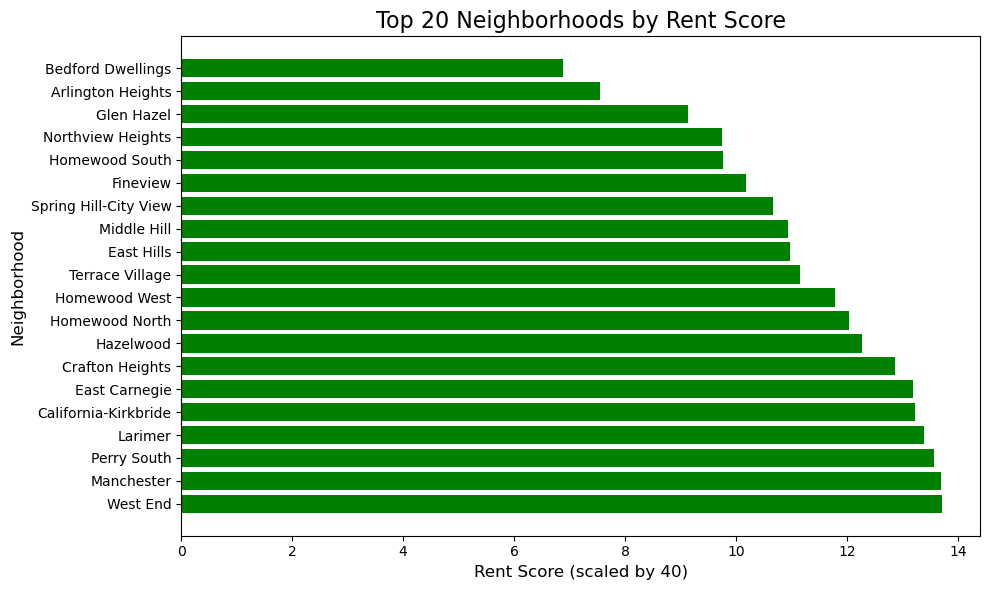

In [11]:
import matplotlib.pyplot as plt

# sets the number of neighborhoods to be displayed
yAxis = 20  

#collects the top neighborhoods using amount provided in yAxis variable
bestNeighborhoods = sorted_data.head(yAxis)

# collects and establishes neighborhoods and rent scores
neighborhoods = bestNeighborhoods['Neighborhood'].tolist()
rentScores = bestNeighborhoods['scaledRent'].tolist()

# creates the graph
plt.figure(figsize=(10, 6))  
plt.barh(neighborhoods, rentScores, color='green')

plt.title(f'Top {yAxis} Pittsburgh Neighborhoods by Rent Score', fontsize=16)
plt.xlabel('Rent Score (scaled by 40)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

#inverts so the best score will be at the top 
plt.gca().invert_yaxis()

#removes overlap
plt.tight_layout()
plt.show()

According to the data and as shown in the bar graph, when considering housing availability and affordability, Bedford Dwellings is the best neighborhood. This is considering the number of units available along with the average price of units.

Bedford Dwellings is a small neighborhood near Strip District, my favorite neighborhood. It is really just a cluster of housing spaces and looks somewhat run down. Currently there is a plan in place to redevelop the area to create a environment condusive to a better quality of living. I disagree that this is the best place to live, but that a better way to put it is as the most accessible/affordable. Perhaps after the renovations it will gain points for overall best neighborhood. 